<h2> Example 1: Accessing draws and properties of various standard distributions in Julia. </h2>

To access several standard probability distributions, we need to load the Julia package "Distributions".  In order to plot things later on, we'll use "PyPlot", which is a Julia wrapper for the Python plotting package "matplotlib".

In [2]:
using Distributions
using PyPlot

Next, we'll create an instance of a distribution object corresponding to the standard distribution of our choice.  As a baseline, I'll just set it to be a Normal(0,1) distribution.  To rerun the code with an alternative distribution, simply change the specification of the variable d.  Possible alternatives include DiscreteUniform(), Bernoulli(), Binomial(), Poisson(), Uniform(), Exponential(), LogNormal(), Cauchy(), and Pareto().

In order to change the parameters of the distribution, include them in the brackets.  For example, for a normal distribution of mean 2 and standard deviation 0.67, you can specify Normal(2,0.67).

In [3]:
d = Normal()

Normal{Float64}(μ=0.0, σ=1.0)

We can now produce several draws from the selected distribution d using the function rand().

In [7]:
x = rand(d,100)

100-element Array{Float64,1}:
 -0.36674592755308766 
  1.6346659351514075  
  0.9051494751851855  
 -1.3600124050737556  
  1.7864986304754622  
  0.4310699317159747  
  2.0674585596933204  
  1.4076527397134238  
 -1.2295487966835636  
 -0.5550330750474466  
 -2.179453494084578   
 -0.38176043684514577 
 -0.09185147689159061 
  ⋮                   
  0.07800167921245496 
 -0.5230000204664422  
 -0.12551356299472502 
 -1.2191262480887246  
 -1.0740077400259644  
  1.162584211435295   
 -0.4786877491953728  
 -0.5519699759490087  
 -0.11208986861383219 
 -1.534715057293921   
  0.025094949939870125
  0.022528556286397695

We can also compute the theoretical values of the mean, variance, skewness, and kurtosis from the specified distribution parameters using theoretical formulas.  Keep in mind that the measure of kurtosis that Julia computes is actually the <i> excess kurtosis</i>, which is equal to the fourth central moment minus that of a standard normal distribution, which has fourth moment equal to 3.

In [8]:
mu = mean(d);
sigsq = var(d);
skw = skewness(d);
krt = kurtosis(d);

println("Mean: ", mu)
println("Variance: ", sigsq)
println("Skewness: ", skw)
println("Kurtosis: ", krt)

Mean: 0.0
Variance: 1.0
Skewness: 0.0
Kurtosis: 0.0


The function mean(), when applied to a vector, will give us the average value of the vector components.  Note that when applied to the random draws x, this gives something relatively close to the theoretical mean of the distribution.

In [9]:
mean(x)

-0.056655088275700816

We can compute values of the cummulative distribution function and probability distribution function at a point w using cdf(d,w) and pdf(d,w) respectively.  For example, 

In [11]:
cdf(d,0)

0.5

To plot the these functions, we compute their values gcdf and gpdf on a grid of tightly spaced points gw, and use the PyPlot function plot().  

Note that the . after the function calls to cdf and pdf tells Julia to call the function element-wise on the grid gw.  This is a language-wide convention that also applies to operators; for example, x .* x would compute product of x with itself component-by-component.

The remaining commands are just tidying up the plots by including horizontal or vertical lines at important values and setting axis bounds.

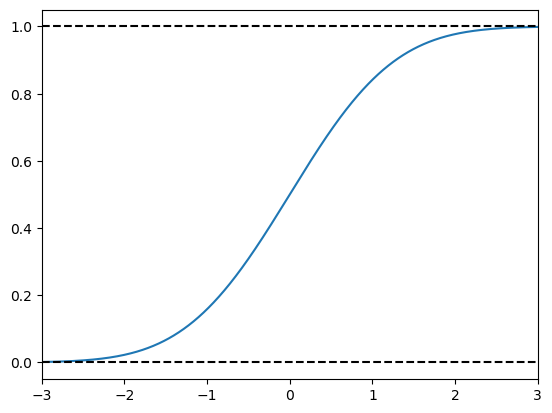

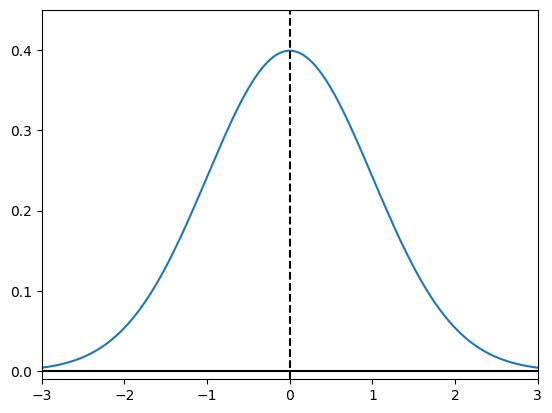

In [24]:
gw = range(-3,3,length=1000);
gcdf = cdf.(d,gw);
gpdf = pdf.(d,gw);
plot(gw,gcdf)
plot(-3:0.01:3,ones(length(-3:0.01:3)),color="k","--")
plot(-3:0.01:3,zeros(length(-3:0.01:3)),color="k","--")
xlim([-3;3]);
figure()
plot(gw,gpdf)
plot(zeros(length(-0.01:0.01:1)),-0.01:0.01:1,color="k","--")
plot(-3:0.01:3,zeros(length(-3:0.01:3)),color="k")
xlim([-3;3]);
ylim([-0.01;0.45]);

Finally, we can fit a distribution to the draws x using the function fit().  This function takes two arguments:

1. The type of distribution to be fit.
2. A vector of data to fit it to.

The first of these is slightly subtle, requiring some knowledge of object-oriented programming and being aware of the fact that the Julia compiler is rigid with regards to what it will allow for a given object type.  For now, it is enough to know that every variable in Julia has an associated type which can be accessed with the function typeof().  For example:

In [17]:
typeof(d)

Normal{Float64}

We can now use the fit command by using typeof() to hand it the distribution type we want, without knowing exactly how these types are defined.

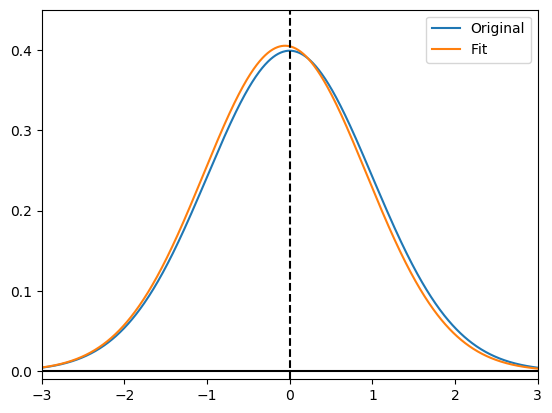



Normal{Float64}(μ=-0.05665508827570084, σ=0.9847801701122569)


In [25]:
dFit=fit(typeof(d),x)
gpdfFit = pdf.(dFit,gw);
figure()
plot(gw,gpdf,label="Original");
plot(gw,gpdfFit,label="Fit");
plot(zeros(length(-0.01:0.01:1)),-0.01:0.01:1,color="k","--");
plot(-3:0.01:3,zeros(length(-3:0.01:3)),color="k");
xlim([-3;3]);
ylim([-0.01;0.45]);
legend()
println()
println()
println(dFit)

For fitting a normal distribution, the mean and standard deviation are close that the PDF approximately overlaps the original distribution. How about a Cauchy distribution?

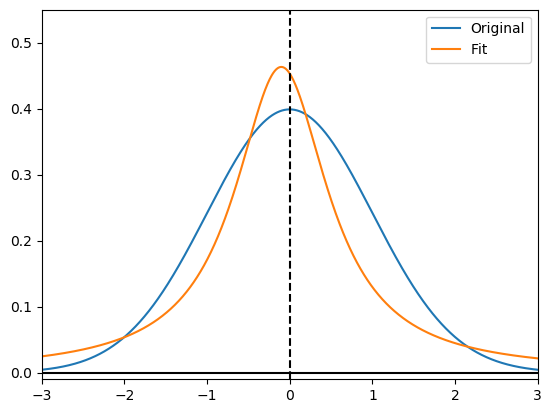



Cauchy{Float64}(μ=-0.1019706727527114, σ=0.6871402917126423)


In [28]:
dFitCauchy=fit(typeof(Cauchy()),x)
gpdfFitCauchy = pdf.(dFitCauchy,gw);
figure()
plot(gw,gpdf,label="Original");
plot(gw,gpdfFitCauchy,label="Fit");
plot(zeros(length(-0.01:0.01:1)),-0.01:0.01:1,color="k","--");
plot(-3:0.01:3,zeros(length(-3:0.01:3)),color="k");
xlim([-3;3]);
ylim([-0.01;0.55]);
legend()
println()
println()
println(dFitCauchy)

The fit now becomes very poor.  The Cauchy PDF has much heavier tails that the original Normal PDF, and much less mass in the shoulders.